# Book Recommendations

The goal of the project is to build a recommender system that suggests relevant books based on person's interests.

## Data Analysis

This Jupyter notebook includes:
1. Information about the dataset
2. Downloading the ratings data (ratings.csv)
3. Splitting the ratings data into training and test sets
4. Data Exploration

## 1. Information about the dataset

goodbooks-10k 

https://github.com/zygmuntz/goodbooks-10k

Dataset contains six million ratings for ten thousand most popular (with most ratings) books.

**ratings.csv**: ratings sorted by time. Ratings go from one to five. Both book IDs and user IDs are contiguous. For books, they are 1-10000; for users, 1-53424.

**books.csv**: metadata for each book (goodreads IDs, authors, title, average rating, etc.).

Each book may have many editions. goodreads_book_id and best_book_id generally point to the most popular edition of a given book, while goodreads work_id refers to the book in the abstract sense.

Note: book_id in ratings.csv maps to work_id, not to goodreads_book_id, meaning that ratings for different editions are aggregated.

## 2. Download the ratings data (from ratings.csv)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Read the file with ratings into a pandas DataFrame

ratings = pd.read_csv('F:\\Downloads\\data_books\\goodbooks-10k\\ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


#### Information about the DataFrame

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


#### Check if there are missing values:

In [4]:
ratings.isnull().sum()

# There are no missing values

user_id    0
book_id    0
rating     0
dtype: int64

#### Number of unique users and books in the dataset 

In [5]:
# Number of unique users

num_users = len(ratings['user_id'].unique())
num_users

53424

In [6]:
# Number of unique books

num_books = len(ratings['book_id'].unique())
num_books

10000

#### Rating values and their proportions in the dataset

In [7]:
# Rating values: 1, 2, 3, 4, 5

ratings['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [8]:
# rating proportions
# ratings 1 and 2 are very rare

ratings['rating'].value_counts() / len(ratings)

4    0.357906
5    0.331816
3    0.229385
2    0.060112
1    0.020781
Name: rating, dtype: float64

## 3. Split the ratings data into training and test sets

Keep the proportions of rating values.

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(ratings, test_size=0.15, random_state=42, stratify=ratings['rating'])

print(train_set.shape)
print(test_set.shape)

(5080007, 3)
(896472, 3)


Save the training and test sets as csv files:

In [15]:
train_set.to_csv('../data/ratings_train.csv', index=False)
test_set.to_csv('../data/ratings_test.csv', index=False)

## 4. Data Exploration

### Training Set Info

In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080007 entries, 660939 to 349688
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 155.0 MB


The training set includes all users and books from the original dataset:

In [37]:
num_users_train = len(train_set['user_id'].unique())
num_users_train

53424

In [38]:
num_books_train = len(train_set['book_id'].unique())
num_books_train

10000

### Ratings

Summary statistics:

In [39]:
train_set['rating'].describe()

# average rating is about 3.92

count    5.080007e+06
mean     3.919865e+00
std      9.910869e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Plot the distribution of ratings:

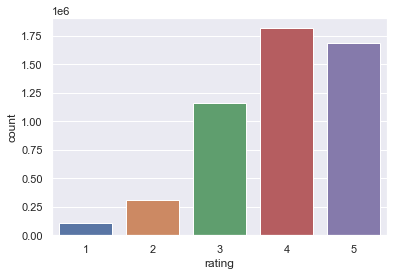

In [40]:
# Higher ratings are more common

sns.countplot(data=train_set, x='rating');

In [41]:
# Percentage of available ratings (out of all possible ratings) = 0.95%

ratings_available_pt = len(train_set) / (num_users_train * num_books_train) * 100
ratings_available_pt

0.9508848083258461

### Ratings given by each user

In [42]:
# Number of ratings and average rating per user

ratings_per_user = train_set.groupby('user_id')['rating'].agg(['count', 'mean'])
ratings_per_user

,count,mean
user_id,,
1,101,3.613861
2,60,4.433333
3,76,1.684211
4,114,3.771930
5,87,4.000000
...,...,...
53420,94,3.329787
53421,94,4.659574
53422,108,4.138889


In [43]:
ratings_per_user.describe()

# min number of ratings per user = 15
# max number = 176

,count,mean
count,53424.000000,53424.000000
mean,95.088481,3.928509
std,22.464575,0.451102
min,15.000000,1.000000
25%,81.000000,3.632353
50%,94.000000,3.921053
75%,109.000000,4.224299
max,176.000000,5.000000


Plot histograms:

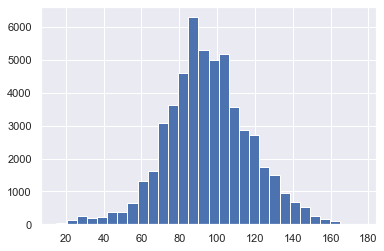

In [44]:
# Number of ratings per user
# Looks close to a normal distribution

ratings_per_user['count'].hist(bins=30);

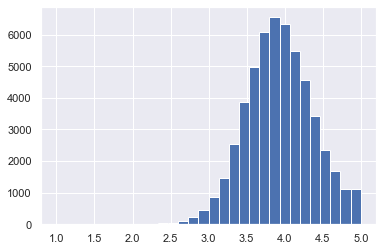

In [45]:
# Average rating per user
# The distribution is shifted and centered around 3.9

ratings_per_user['mean'].hist(bins=30);

### Ratings per book

In [46]:
# Number of ratings and average rating for each book

ratings_per_book = train_set.groupby('book_id')['rating'].agg(['count', 'mean'])
ratings_per_book.describe()

,count,mean
count,10000.000000,10000.000000
mean,508.000700,3.903178
std,1077.699997,0.286876
min,8.000000,2.061728
25%,132.000000,3.725490
50%,210.000000,3.923077
75%,431.000000,4.097952
max,19342.000000,4.868421


- Min number of ratings = 8
- 75% of books have <= 431 ratings
- Some books have very high amount of ratings: max number of ratings = 19,342

Plot histograms:

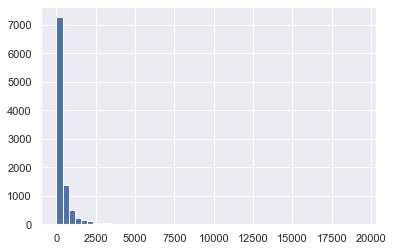

In [48]:
# Number of ratings per book

ratings_per_book['count'].hist(bins=50);

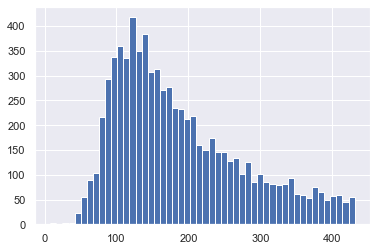

In [58]:
# A closer look at 75% of the books (number of ratings <= 431)

books_75_percent = ratings_per_book[ratings_per_book['count'] <= 431]
books_75_percent['count'].hist(bins=50);

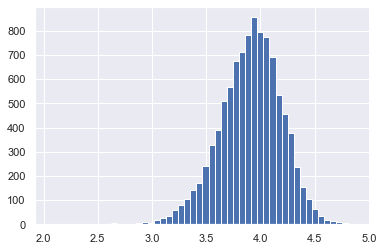

In [49]:
# Average rating for a book

ratings_per_book['mean'].hist(bins=50);

Scatter plot: 

Average Rating vs. Number of Ratings for that book

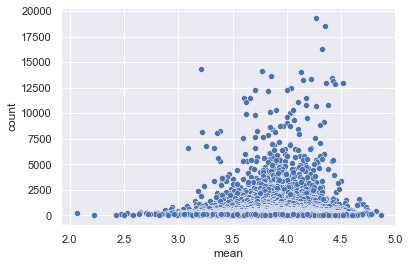

In [51]:
sns.scatterplot(x=ratings_per_book['mean'], y=ratings_per_book['count']);

Most books with number of ratings greater than 10,000 got average ratings in the range from 3.5 to 4.5. Probably these are famous books and many people liked them.

Check how many books have few ratings and what average rating they got:

In [56]:
less_than_30_ratings = ratings_per_book[ratings_per_book['count'] < 30]
less_than_30_ratings

# just a few books

,count,mean
book_id,,
7803,8,3.375000
9345,11,3.545455
9486,20,4.250000
